In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset
data = pd.read_csv("/content/power_consumption_regression.csv")

# Step 1: Check for duplicates and missing values
print("\nChecking for duplicates and missing values...")
print(f"Duplicates: {data.duplicated().sum()}")
print(f"Missing values: {data.isnull().sum().sum()}")

# Drop the redundant index column if it exists
data.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")





Checking for duplicates and missing values...
Duplicates: 0
Missing values: 0


In [35]:
# Identify and print columns with outliers
def identify_outliers(df, columns):
    outlier_columns = []
    for col in columns:
        mean_value = df[col].mean()
        std_dev = df[col].std()
        lower_bound = mean_value - 3 * std_dev
        upper_bound = mean_value + 3 * std_dev
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(col)
            print(f"Column '{col}' has outliers.")
    return outlier_columns

numeric_columns = data.select_dtypes(include=[np.number]).columns
outlier_columns = identify_outliers(data, numeric_columns)

Column 'Temperature' has outliers.
Column 'Humidity' has outliers.
Column 'general_diffuse_flows' has outliers.
Column 'diffuse_flows' has outliers.
Column 'Zone2' has outliers.
Column 'Zone3' has outliers.



Performing Exploratory Data Analysis...


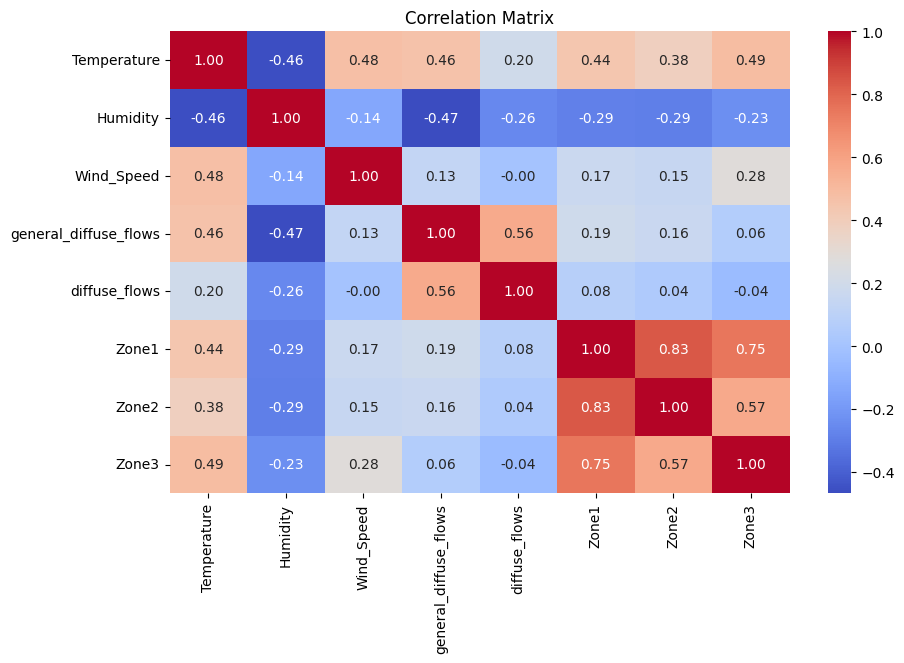

In [29]:
# Step 2: Exploratory Data Analysis (EDA)
print("\nPerforming Exploratory Data Analysis...")
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


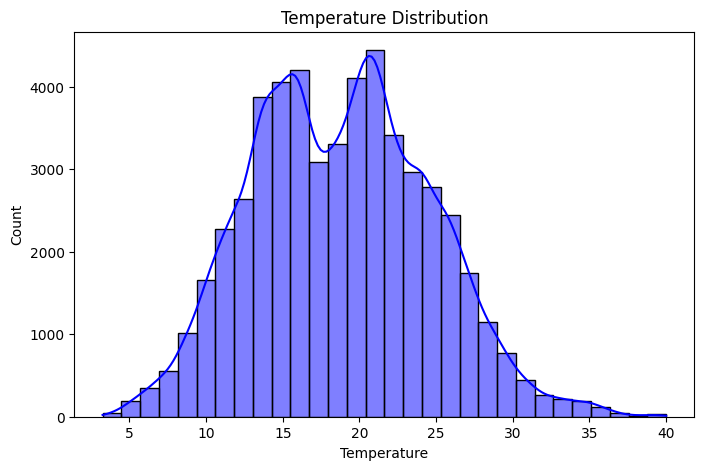

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Temperature"], kde=True, bins=30, color="blue")
plt.title("Temperature Distribution")
plt.show()

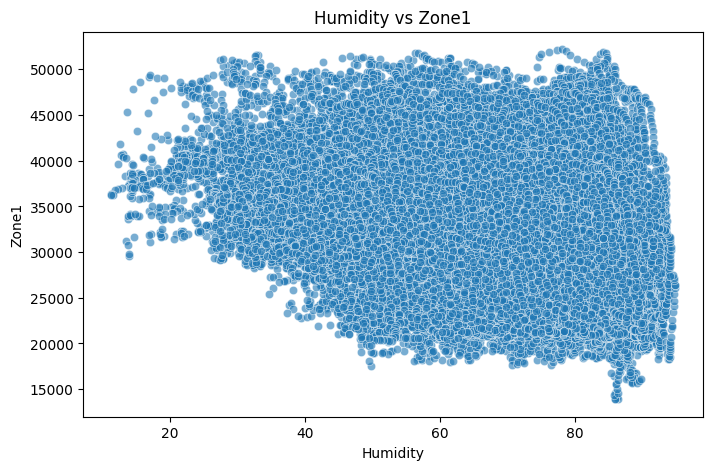

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Humidity"], y=data["Zone1"], alpha=0.6)
plt.title("Humidity vs Zone1")
plt.show()

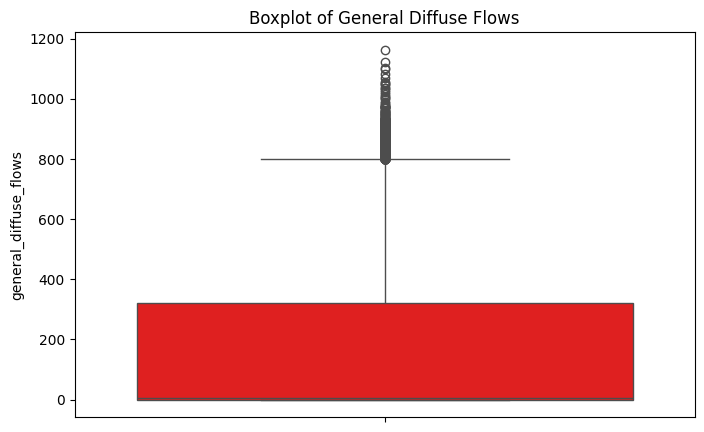

In [38]:
#outliers in "general_diffuse_flows" column
plt.figure(figsize=(8, 5))
sns.boxplot(data=data["general_diffuse_flows"], color="red")
plt.title("Boxplot of General Diffuse Flows")
plt.show()

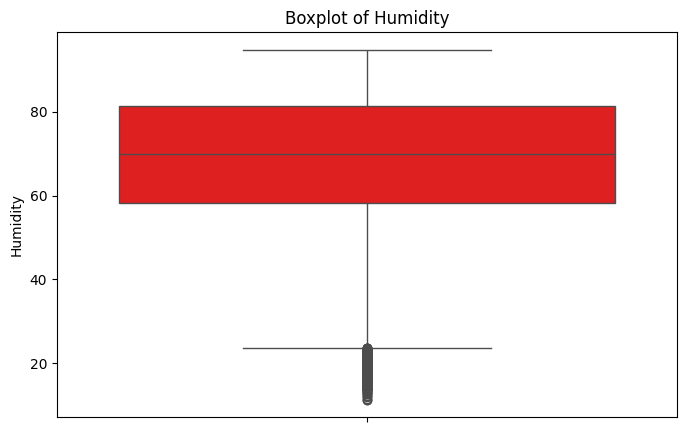

In [37]:
#outliers in "Humidity" column
plt.figure(figsize=(8, 5))
sns.boxplot(data=data["Humidity"], color="red")
plt.title("Boxplot of Humidity")
plt.show()

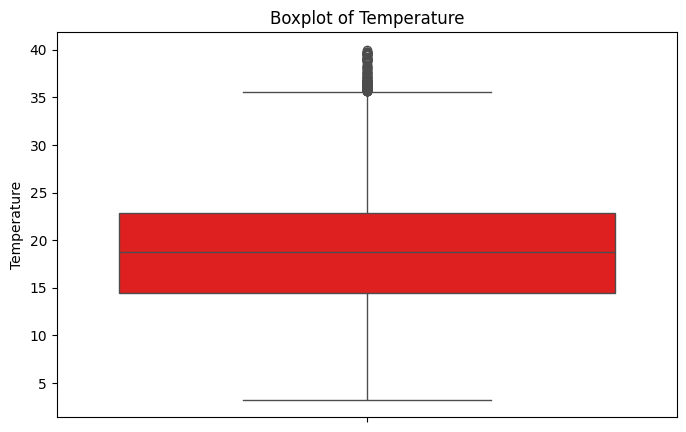

In [39]:
#outliers in "Temperature" column
plt.figure(figsize=(8, 5))
sns.boxplot(data=data["Temperature"], color="red")
plt.title("Boxplot of Temperature")
plt.show()

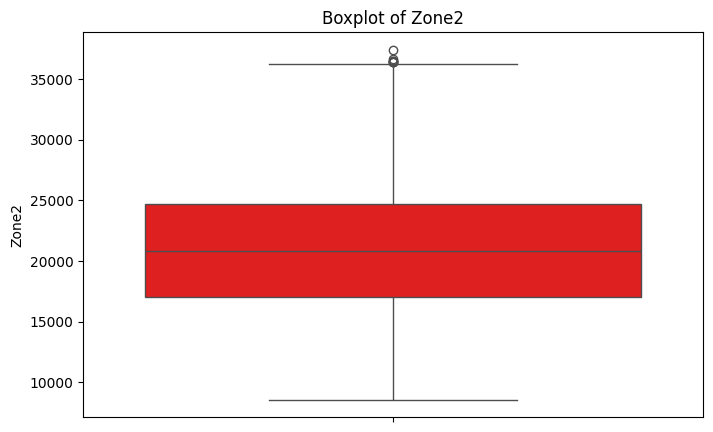

In [41]:
#outliers in "zone2" column
plt.figure(figsize=(8, 5))
sns.boxplot(data=data["Zone2"], color="red")
plt.title("Boxplot of Zone2")
plt.show()

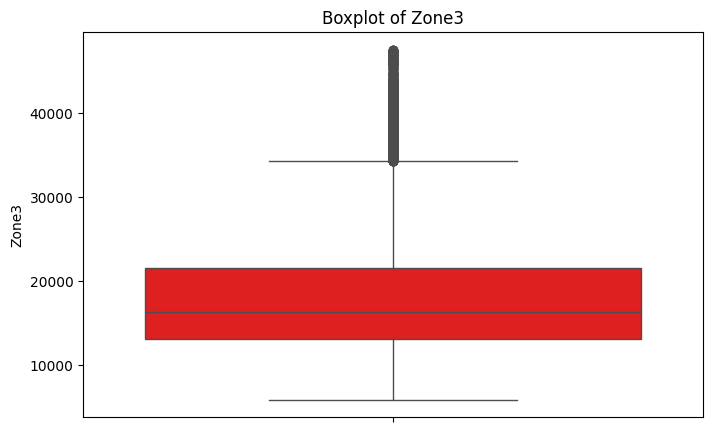

In [42]:
#outliers in "Zone3" column
plt.figure(figsize=(8, 5))
sns.boxplot(data=data["Zone3"], color="red")
plt.title("Boxplot of Zone3")
plt.show()

In [45]:
# Impute outliers with mean values
def impute_outliers_with_mean(df, columns):
    for col in columns:
        mean_value = df[col].mean()
        std_dev = df[col].std()
        lower_bound = mean_value - 3 * std_dev
        upper_bound = mean_value + 3 * std_dev
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mean_value, df[col])

impute_outliers = impute_outliers_with_mean(data, numeric_columns)


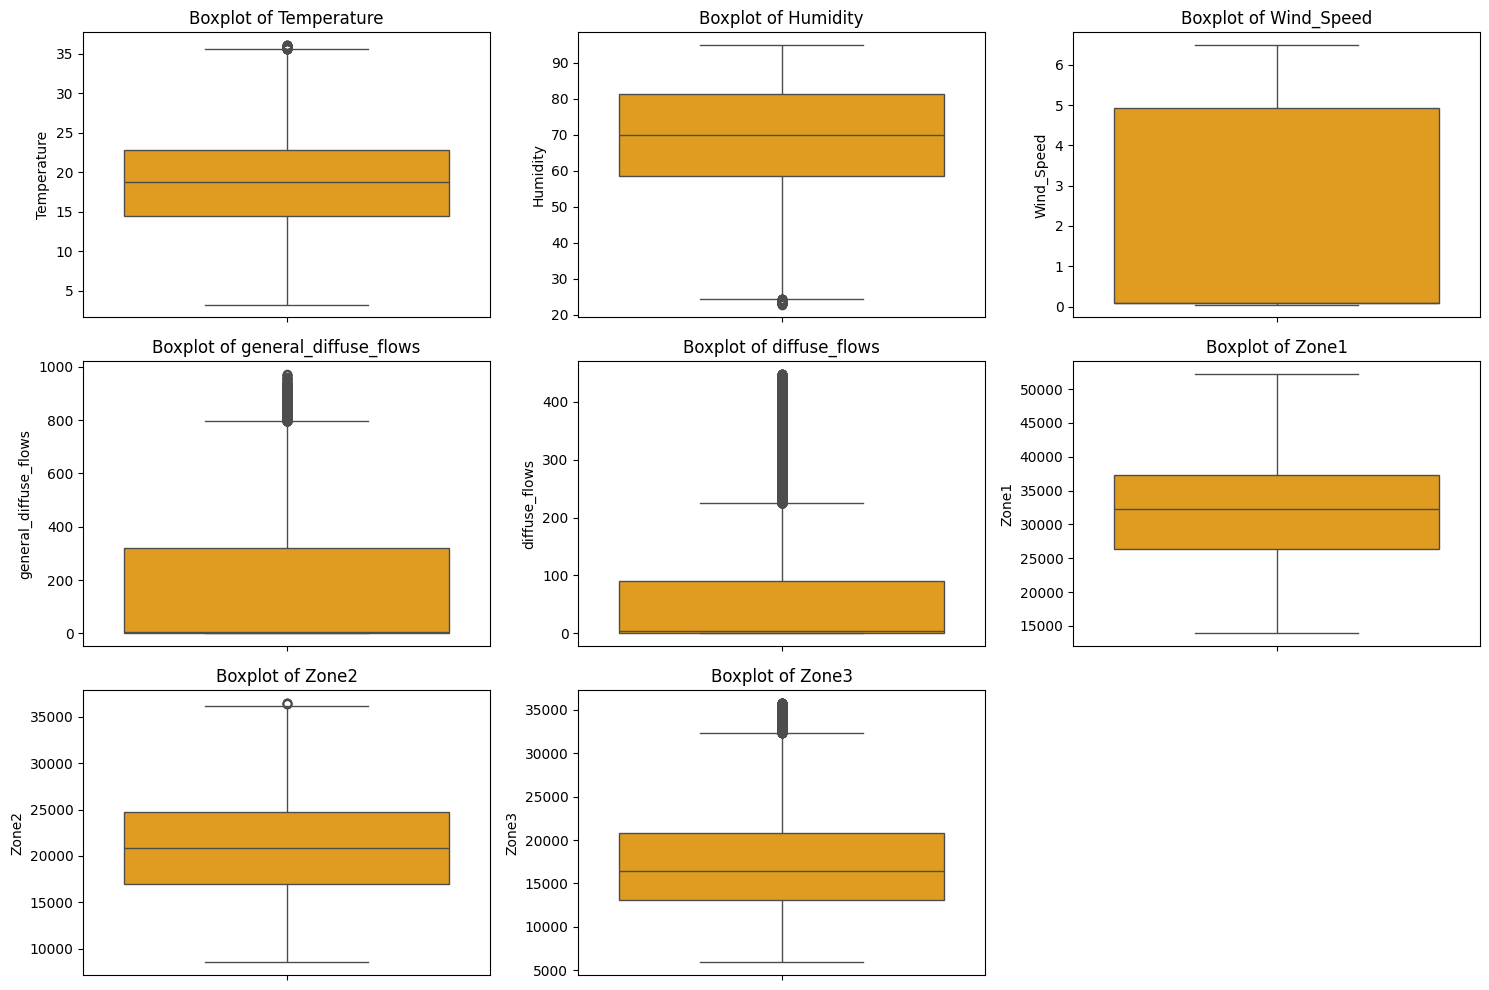

In [46]:

# Generate boxplots for all numeric columns with a loop after imputation
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(data=data[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

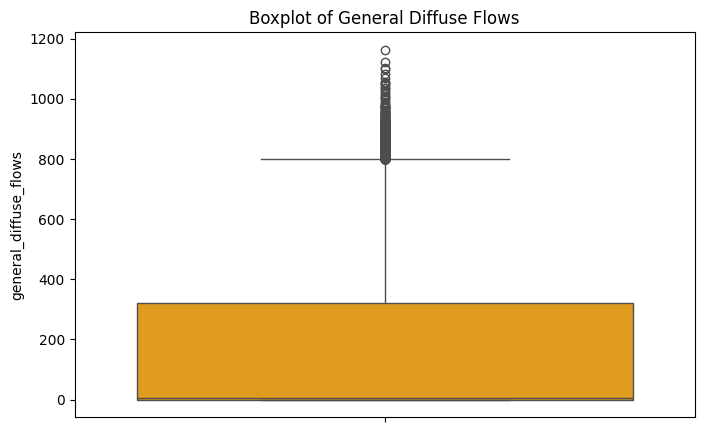

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data["general_diffuse_flows"], color="orange")
plt.title("Boxplot of General Diffuse Flows")
plt.show()

In [47]:

# Step 3: Preparing the data for model training
X = data.drop(columns=["Zone1", "Zone2", "Zone3"])
y = data["Zone1"]  # Example: Predicting Zone1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Step 4: Advanced Model training and evaluation
print("\nTraining and evaluating models with hyperparameter tuning...")

# Define parameter grid for XGBoost
xgb_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
"""
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)
final_predictions = best_xgb_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
print(f"\nBest Model (XGBoost): MSE = {final_mse:.2f}, R2 = {final_r2:.2f}")
"""
# Evaluate other models for comparison
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}: MSE = {mse:.2f}, R2 = {r2:.2f}")


Training and evaluating models with hyperparameter tuning...
Linear Regression: MSE = 39807437.18, R2 = 0.21
Decision Tree: MSE = 42499855.72, R2 = 0.16
Random Forest: MSE = 21540798.72, R2 = 0.57
Gradient Boosting: MSE = 33190814.09, R2 = 0.34
